Index(['Date', 'Revenue', 'Cost Of Goods Sold', 'Gross Profit',
       'Research And Development Expenses', 'SG&A Expenses',
       'Other Operating Income Or Expenses', 'Operating Expenses',
       'Operating Income', 'Total Non-Operating Income/Expense',
       'Pre-Tax Income', 'Income Taxes', 'Income After Taxes', 'Other Income',
       'Income From Continuous Operations',
       'Income From Discontinued Operations', 'Net Income', 'EBITDA', 'EBIT',
       'Basic Shares Outstanding', 'Shares Outstanding', 'Basic EPS',
       'EPS - Earnings Per Share', 'Cash On Hand', 'Receivables', 'Inventory',
       'Pre-Paid Expenses', 'Other Current Assets', 'Total Current Assets',
       'Property, Plant, And Equipment', 'Long-Term Investments',
       'Goodwill And Intangible Assets', 'Other Long-Term Assets',
       'Total Long-Term Assets', 'Total Assets', 'Total Current Liabilities',
       'Long Term Debt', 'Other Non-Current Liabilities',
       'Total Long Term Liabilities', 'Total Lia

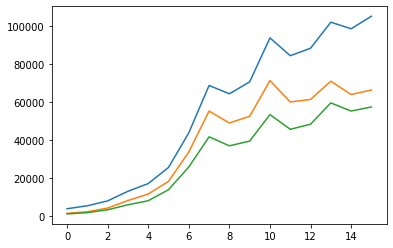

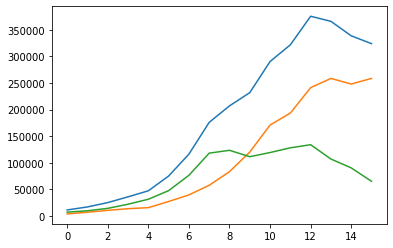

In [16]:
import pandas as pd
from pandas_datareader import data, wb
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

start = pd.to_datetime('2005-01-01')
end = pd.to_datetime('today')

price = data.DataReader('AAPL', 'yahoo', start , end)
price.reset_index(inplace=True,drop=False)
fs = pd.read_csv('Financial_statement.csv')

print(fs.columns)
plt.plot(fs['Gross Profit'])
plt.plot(fs['Operating Income'])
plt.plot(fs['Net Income'])
plt.show()

plt.plot(fs['Total Assets'])
plt.plot(fs['Total Liabilities'])
plt.plot(fs['Share Holder Equity'])

plt.show()

def get_price(date):
    if date.weekday() == 5:
        return price['Adj Close'].loc[pd.to_datetime(price['Date']) == date - timedelta(1)].values
    elif date.weekday() == 6:
        return price['Adj Close'].loc[pd.to_datetime(price['Date']) == date - timedelta(2)].values
    else:
        return price['Adj Close'].loc[pd.to_datetime(price['Date']) == date].values
    

fs['Stock_price'] = fs.apply(lambda x: get_price(pd.to_datetime(x['Date'])), axis = 1)
fs['Stock_price'] = fs['Stock_price'].str[0]
fs['Return'] = (fs['Net Income']*1000000)/fs['Stock_price']
fs['Margin_of_safety'] = (fs['Share Holder Equity']*1000000)/fs['Stock_price']
fs['Book_value'] = (fs['Share Holder Equity'] * 1000)/fs['Shares Outstanding']
fs['P/E ratio'] = (fs['Stock_price']/fs['EPS - Earnings Per Share'])
fs['P/BV ratio'] = fs['Stock_price']/fs['Book_value']
fs['Debt to equity ratio'] = fs['Total Liabilities']/fs['Share Holder Equity']
fs['Current ratio'] = fs['Total Current Assets']/fs['Total Current Liabilities']
fs['ROE'] = fs['EPS - Earnings Per Share']/fs['Book_value']
#print(fs['ROE'])



#print(price['Adj Close'].loc[pd.to_datetime(price['Date']) == date - timedelta(2)].values)


